In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [6]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [7]:
print(df.shape)

(96, 4)


In [9]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [10]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [12]:
df = df.rename({"Life expectancy at birth (years)":"Life_expectancy"}, axis = "columns")
df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


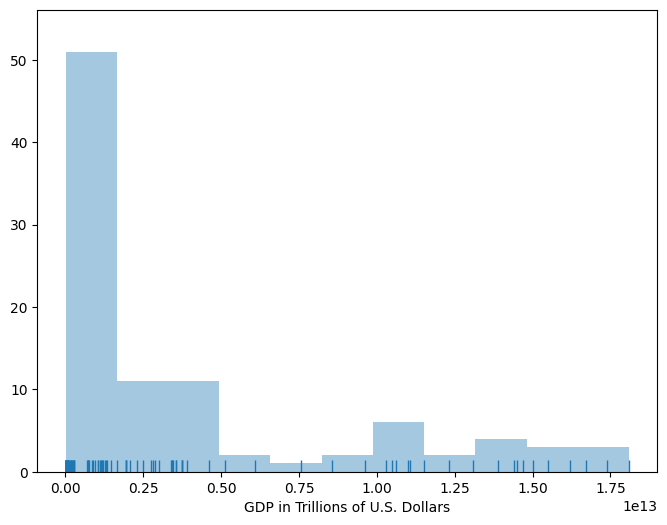

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


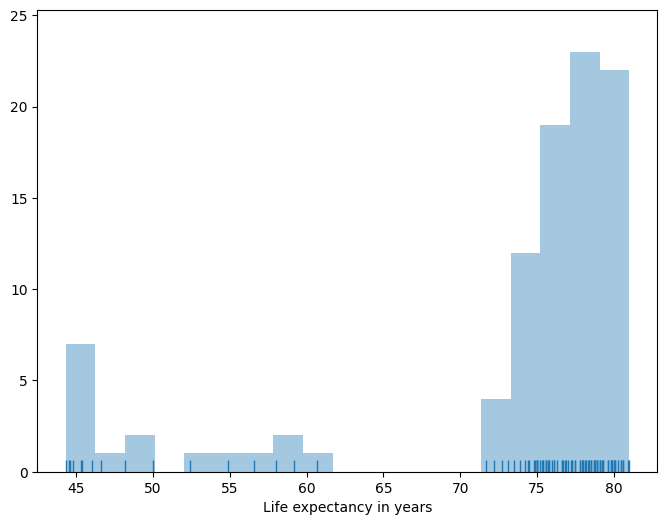

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df.Life_expectancy, rug = True, kde=False)
plt.xlabel("Life expectancy in years");

In [17]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [18]:
dfMeans

,Country,Life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Text(0.5, 0, 'Life expectancy in years')

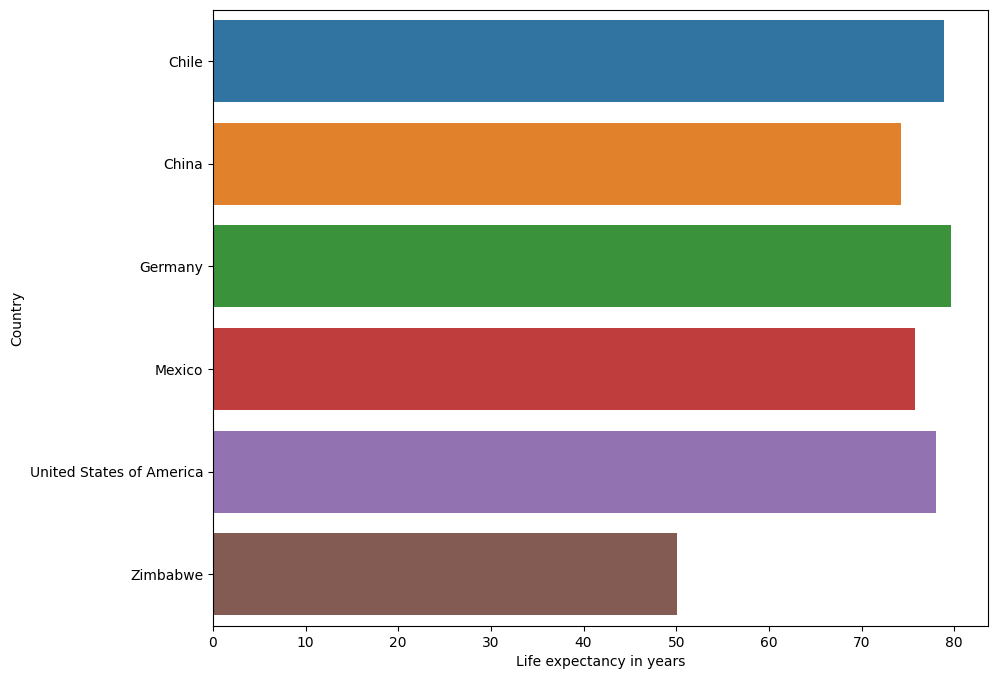

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Life_expectancy', y='Country', data=dfMeans)
plt.xlabel('Life expectancy in years')

Text(0.5, 0, 'GDP in trillions of dollars')

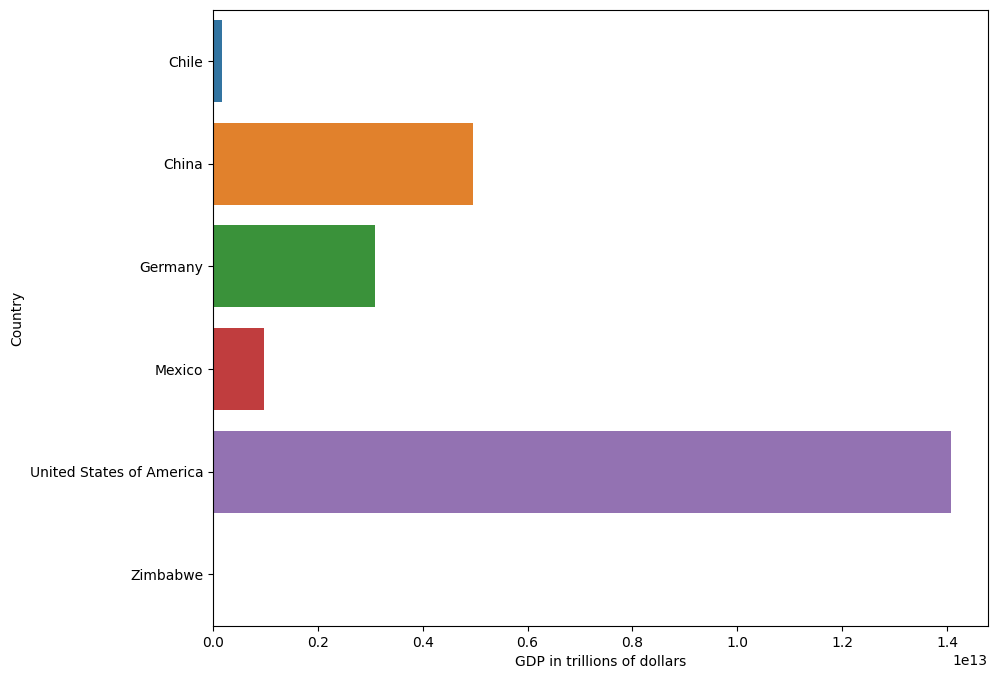

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='GDP', y='Country', data=dfMeans)
plt.xlabel('GDP in trillions of dollars')

Text(0.5, 0, 'Life expectancy in years')

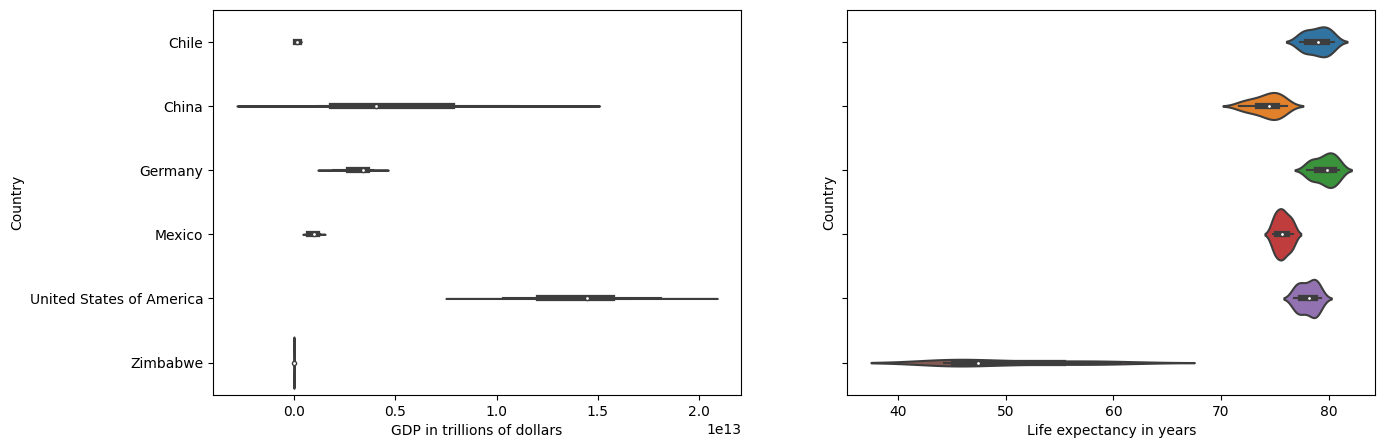

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in trillions of dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_expectancy, y=df.Country)
axes[1].set_xlabel("Life expectancy in years")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


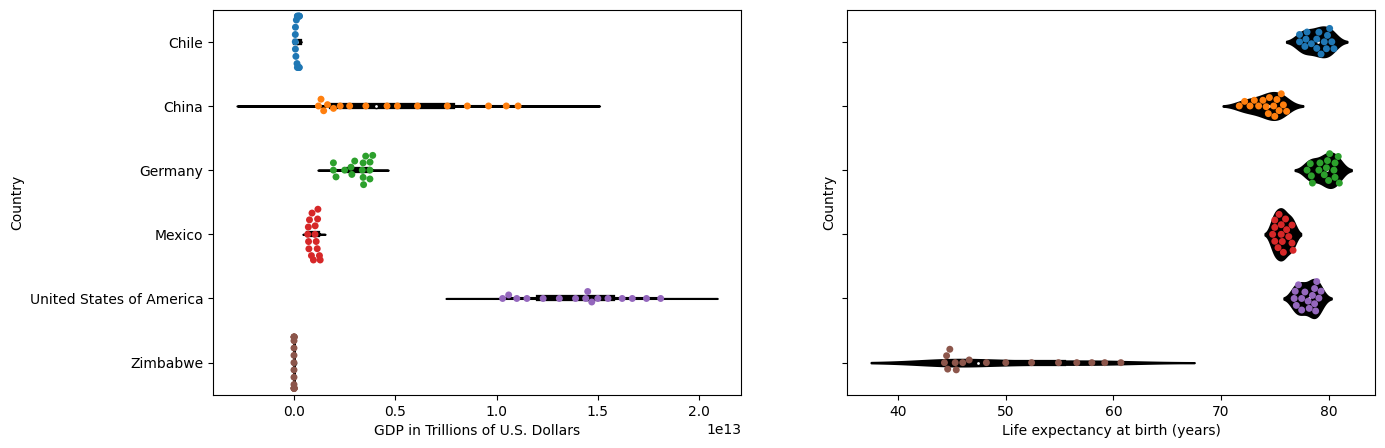

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_expectancy, y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.Life_expectancy, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

Text(0, 0.5, 'GDP in trillions of dollars')

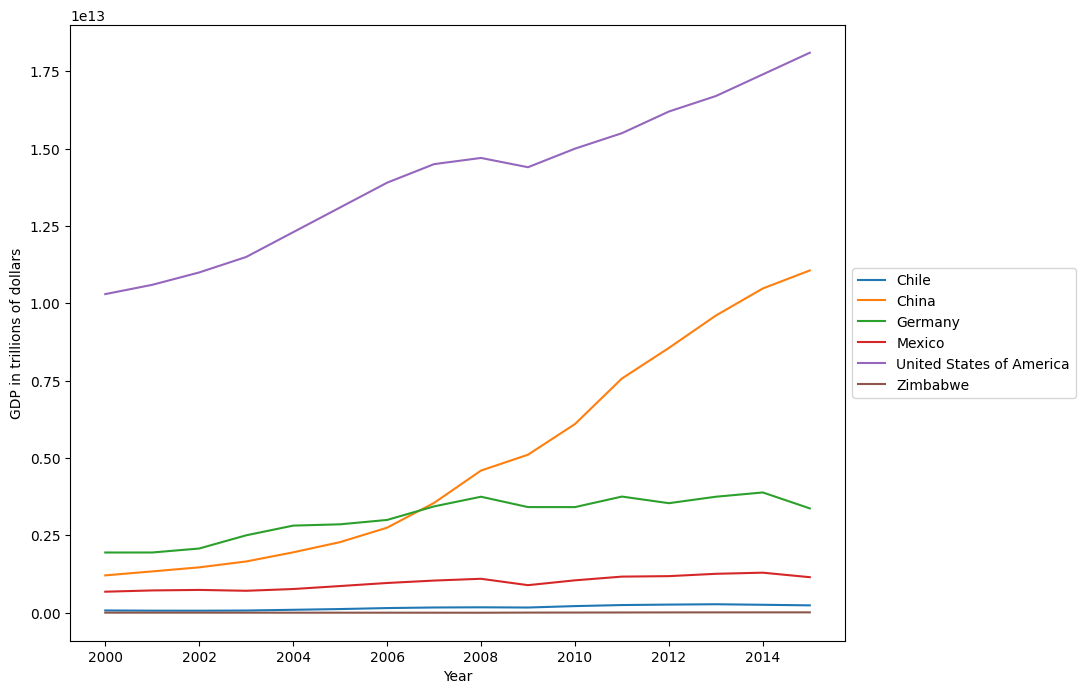

In [32]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in trillions of dollars')

Text(0, 0.5, 'Life expectancy in years')

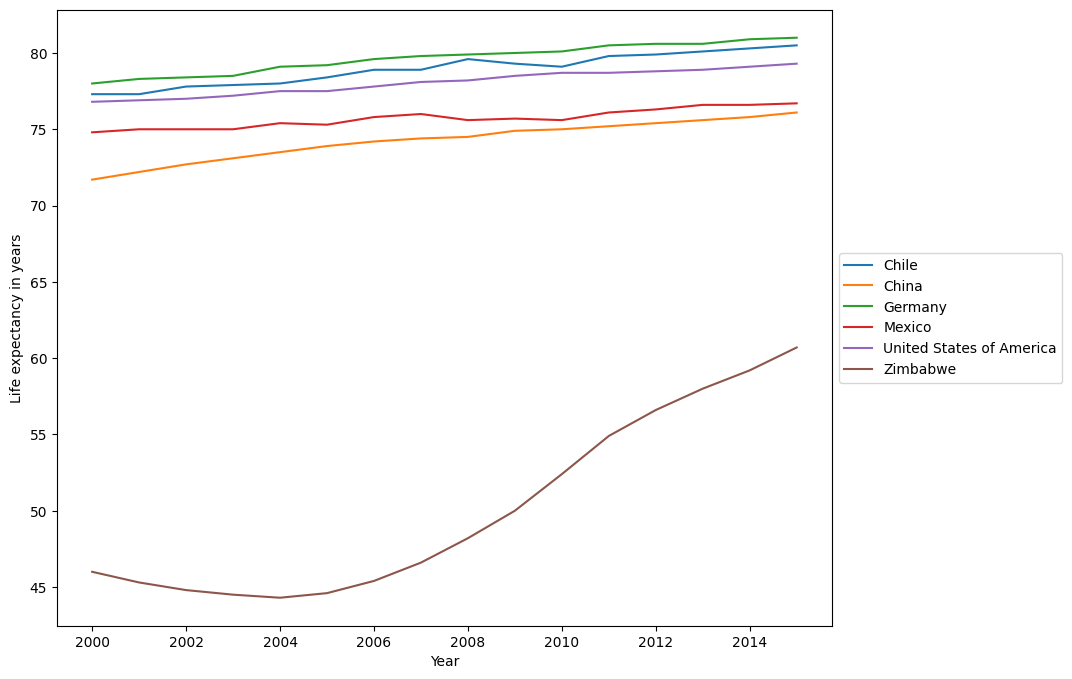

In [33]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df.Year, y=df.Life_expectancy, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life expectancy in years')

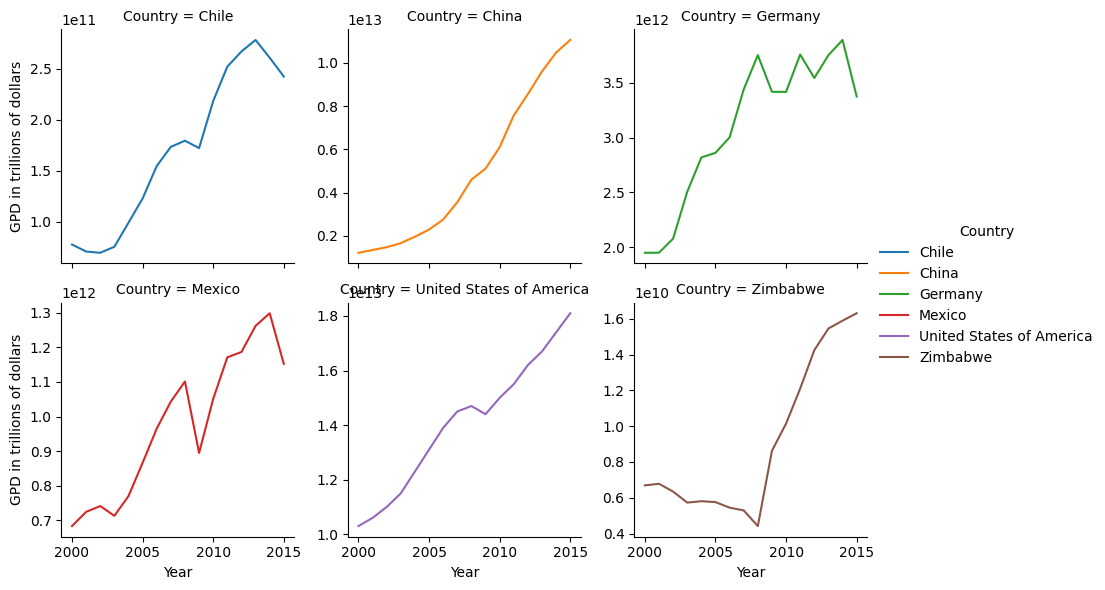

In [34]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP")
            .add_legend()
            .set_axis_labels("Year", "GPD in trillions of dollars"))
graphGDP;

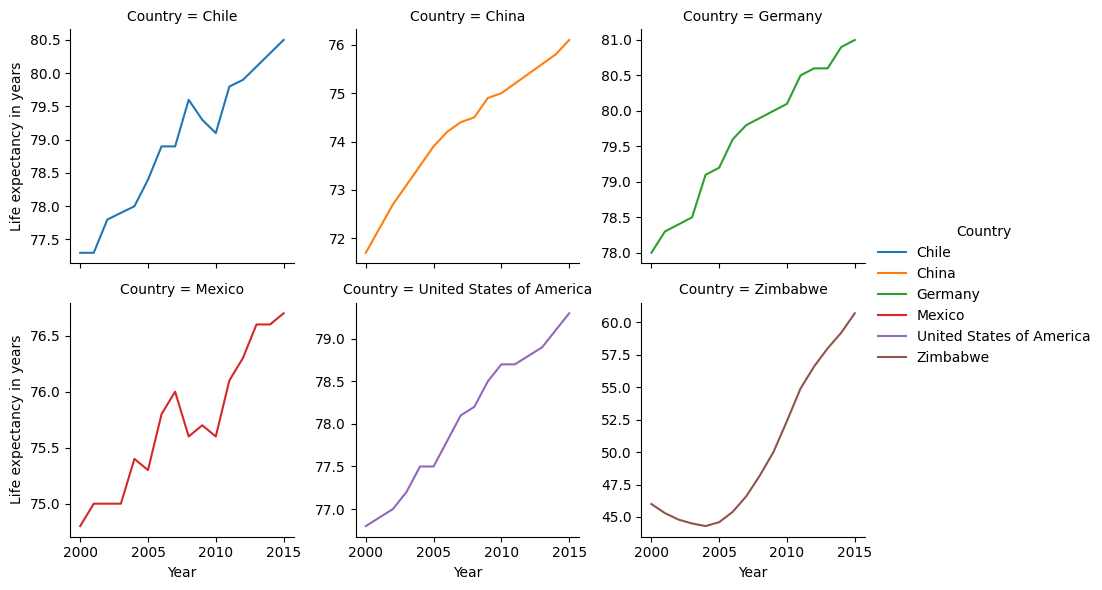

In [35]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "Life_expectancy")
            .add_legend()
            .set_axis_labels("Year", "Life expectancy in years"))
graphGDP;

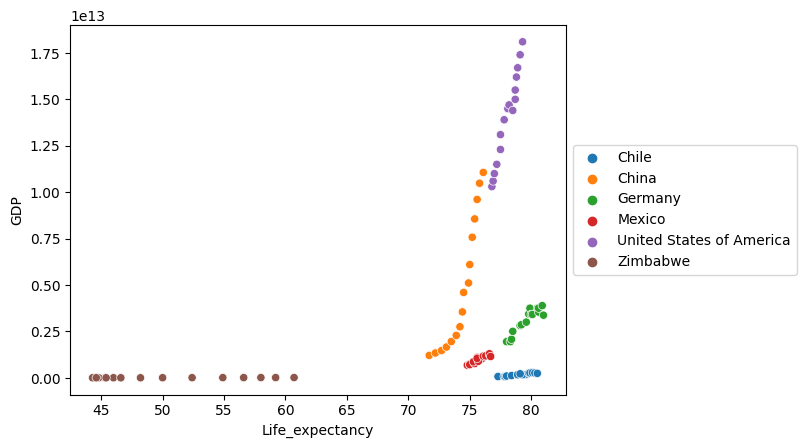

In [36]:
sns.scatterplot(x=df.Life_expectancy, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

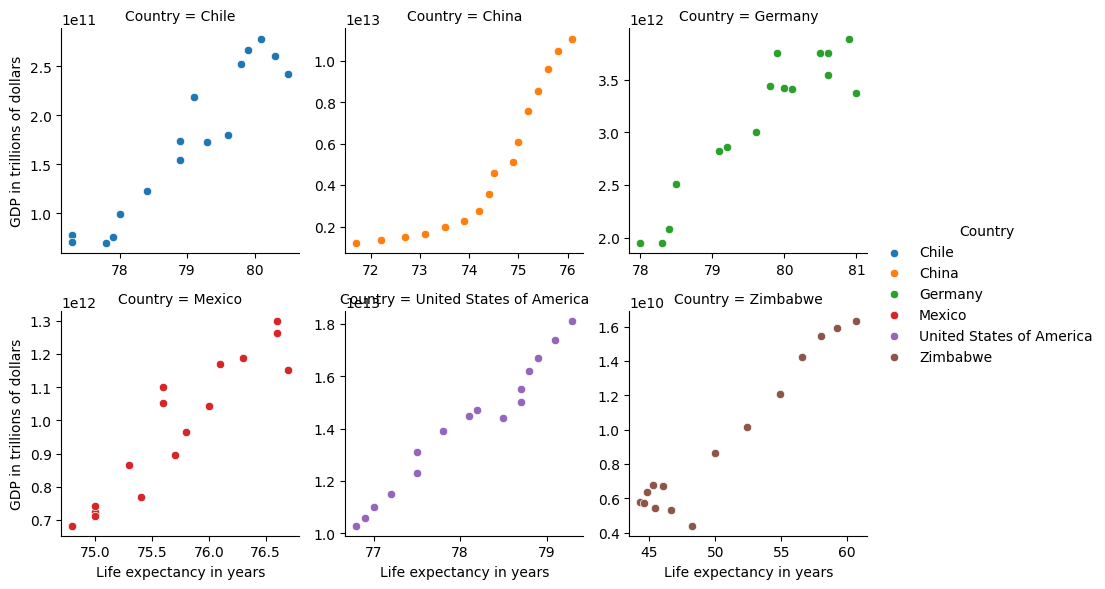

In [38]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue="Country", sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot, "Life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy in years", "GDP in trillions of dollars"));